In [49]:
#import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#import the data
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

### Data Preprocessing

#### Check for missing values

<AxesSubplot:>

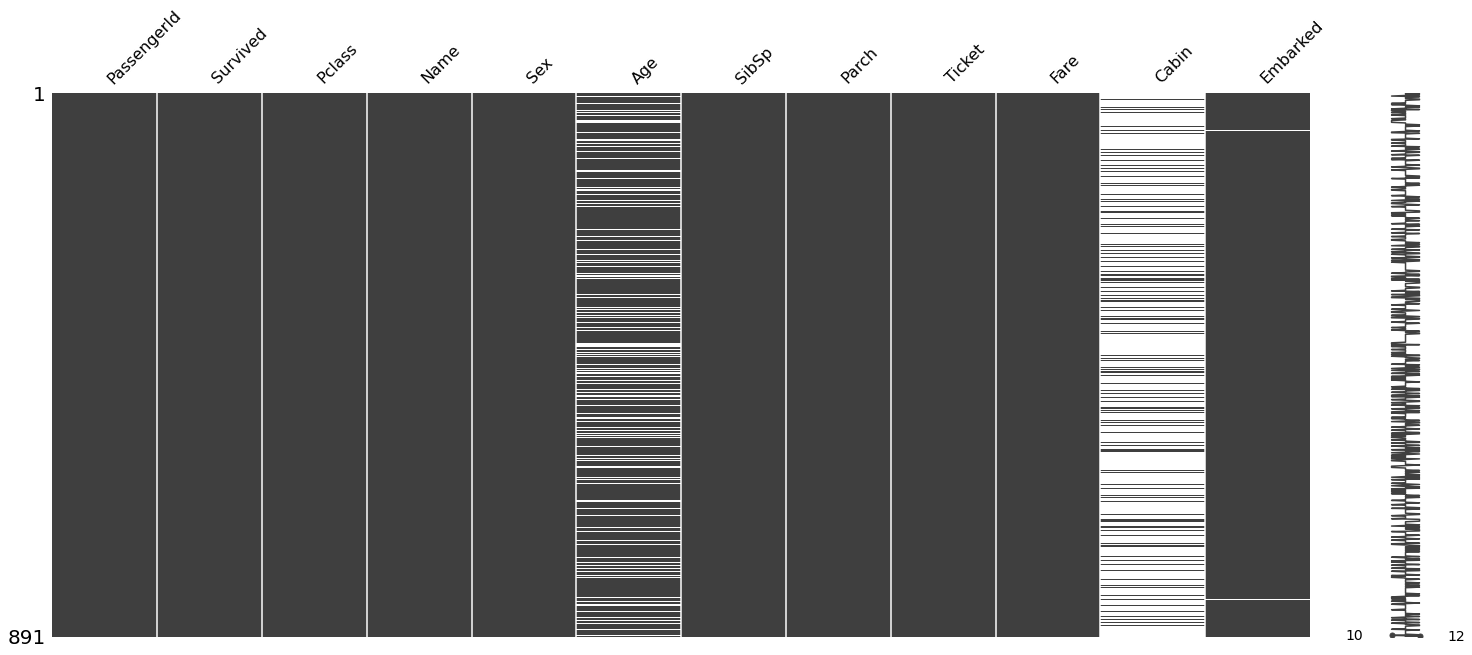

In [3]:
import missingno as msno
msno.matrix(train)

<AxesSubplot:>

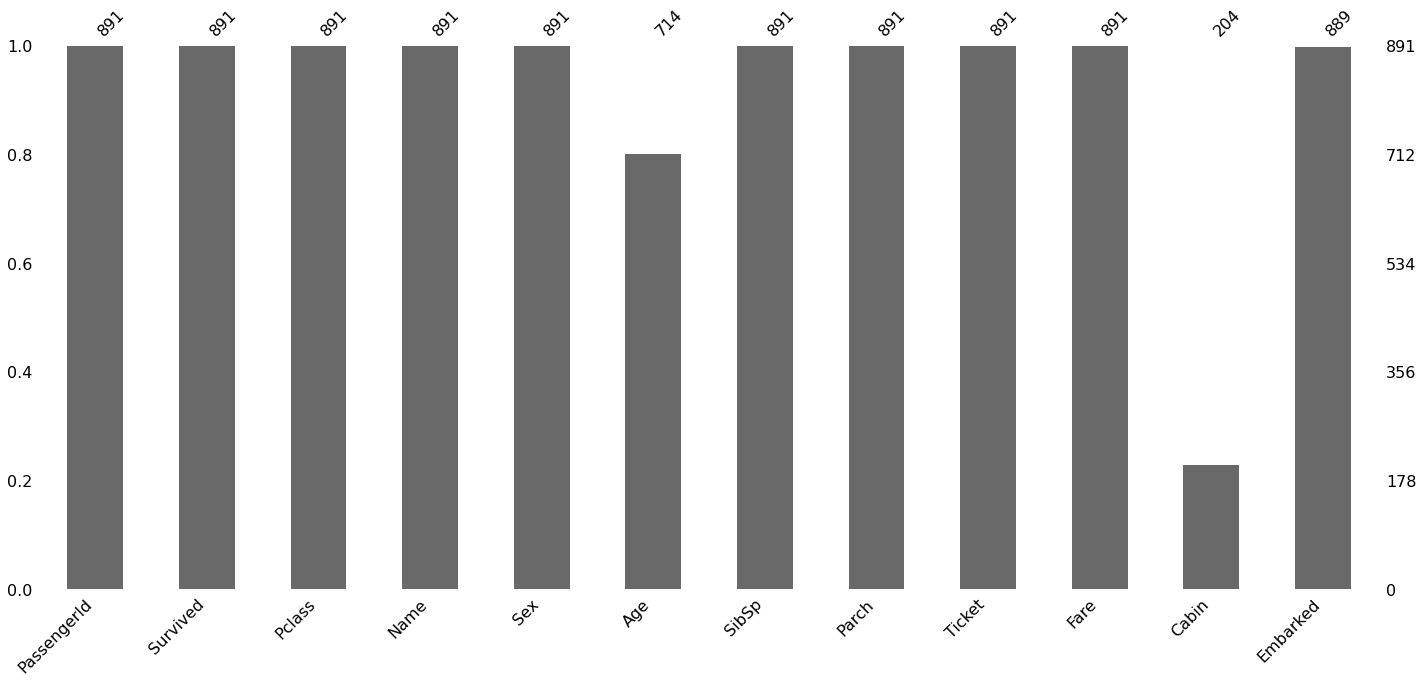

In [4]:
msno.bar(train)

In [5]:
#Delete 'Cabin' column as it has a a lot of missing values
del train['Cabin']

In [6]:
#replace the misssing values of 'Age' column with the median age
train['Age'] = train['Age'].fillna(train['Age'].median())

In [7]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
#repalce the missing values 'Embarked' column with the highest occuring frequency.
train['Embarked'] = train['Embarked'].fillna('S') 

### Univariate Data Analysis

In [9]:
 train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Column : Survived
<br>

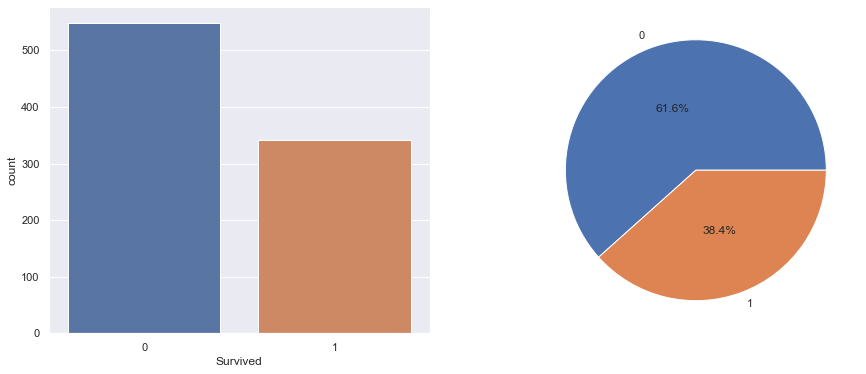

In [68]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train,ax = ax[0])
ax[1] = plt.pie(x=train['Survived'].value_counts(), autopct="%.1f%%", labels = train['Survived'].unique(),pctdistance=0.5)


#### <li>Only about 38.38 % (342) of the total passengers (891) survived.

#### Column : Pclass
<br>

<AxesSubplot:xlabel='Pclass', ylabel='count'>

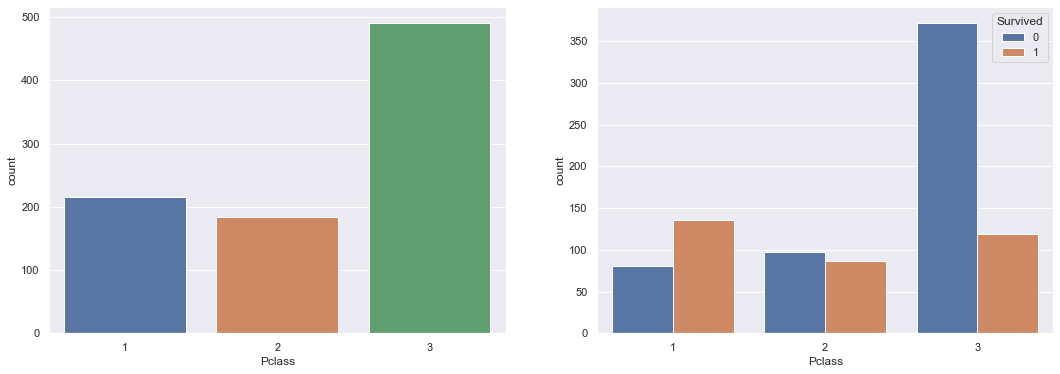

In [12]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Pclass", data=train,ax = ax[0])
sns.countplot(x="Pclass",hue = 'Survived', data=train,ax = ax[1])

Text(0.5, 0.98, 'Composition of passenger classs')

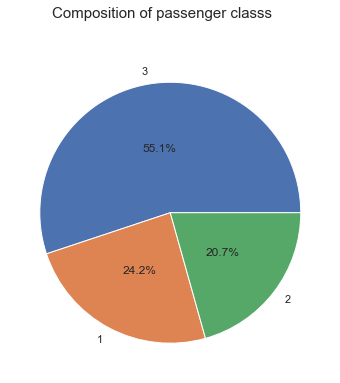

In [76]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize = (9,6))
ax = plt.pie(x=train['Pclass'].value_counts(), autopct="%.1f%%", labels = train['Pclass'].unique(),pctdistance=0.5)
fig.suptitle('Composition of passenger classs', fontsize=15)

In [93]:
#Total Passengers by 'Pclass'
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [91]:
#total survived passengers by 'Pclass'
train[train['Survived'] == 1]['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [92]:
# percentage of surviving 'Pclass'
train[train['Survived'] == 1]['Pclass'].value_counts() / train['Pclass'].value_counts()

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

#### <li>About 55.1 % (491) of the total passengers (891) booked 3rd class ticket.
#### <li>About 62..96 % (136) of the total 1st classs passengers (184) survived.
#### <li>Only 24.23% (119) of the total 3rd classs passengers (491) survived.    

#### Column : Sex
<br>

<AxesSubplot:xlabel='Sex', ylabel='count'>

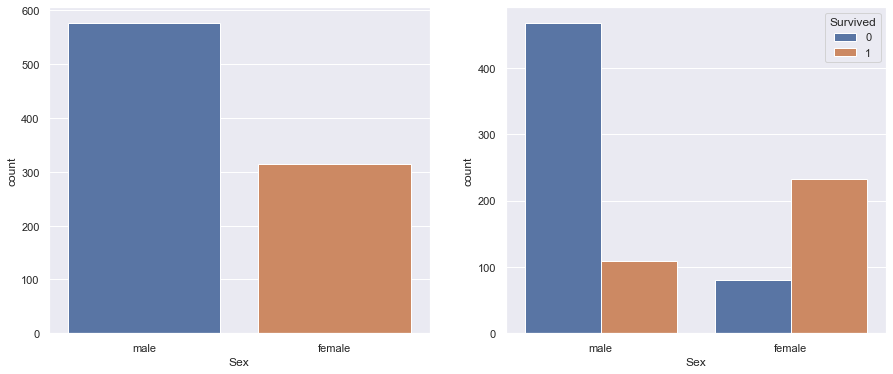

In [103]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Sex", data=train,ax = ax[0])
sns.countplot(x="Sex",hue = 'Survived', data=train,ax = ax[1])

In [131]:
#Passenger 'Sex'
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [130]:
#Survived 'Sex'
train[train['Survived'] == 1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

#### <li>About 74.2 % (233) of the total Female passengers (314) survived.
#### <li>About 18.89 % (109) of the total Male passengers (577) survived.

#### Column : Age
<br>

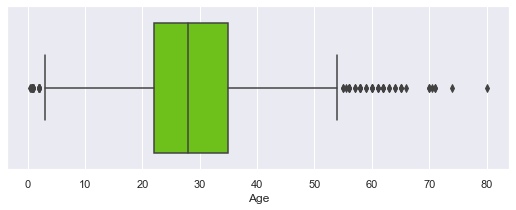

In [14]:
fig,ax = plt.subplots(figsize = (9,3))
ax = sns.boxplot(x=train['Age'],color = '#6edb00')

<AxesSubplot:xlabel='Age', ylabel='Count'>

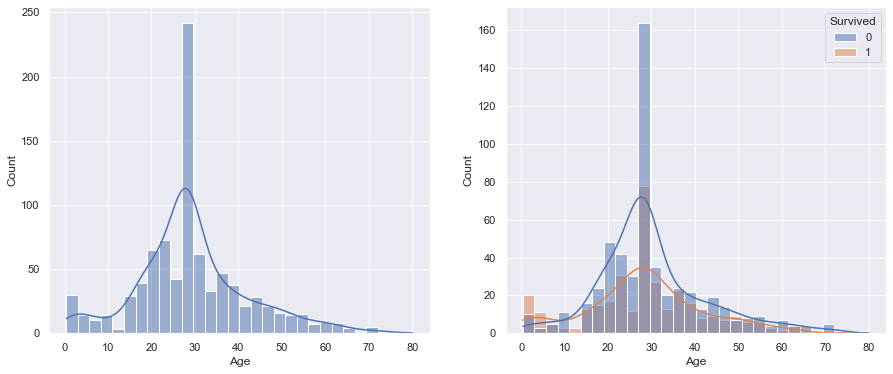

In [104]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.histplot(x="Age",kde = True ,data=train,ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train,ax = ax[1])

Text(0.5, 0.98, 'Age distribution of minors')

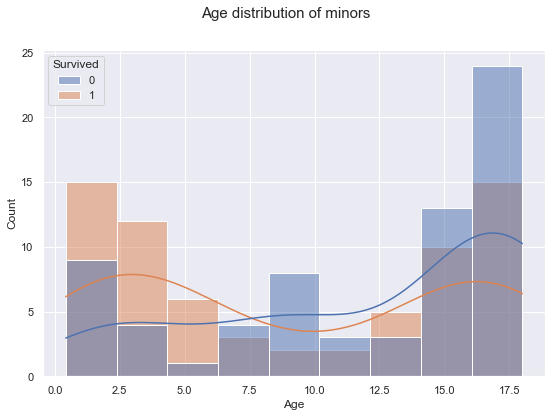

In [16]:
fig,ax = plt.subplots(figsize = (9,6))
ax = sns.histplot(x="Age",kde = True, hue = 'Survived',data=train[train['Age'] <=18.0])
fig.suptitle('Age distribution of minors', fontsize=15)

Text(0.5, 0.98, 'Survival percenatge of minors')

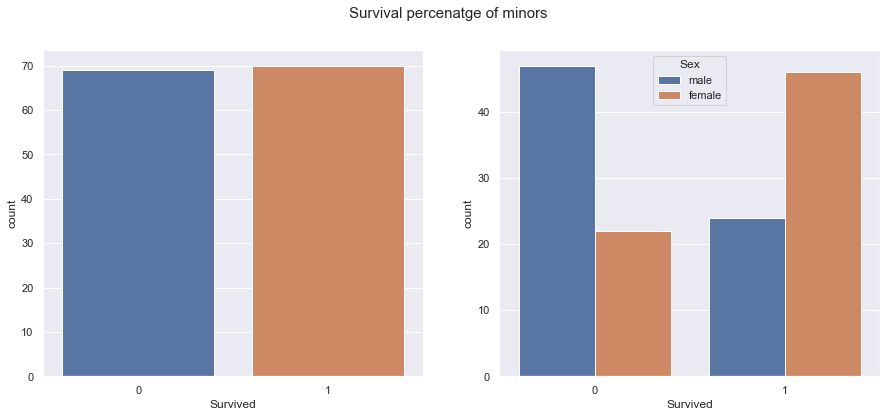

In [117]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['Age'] <=18.0],ax = ax[0])
sns.countplot(x="Survived", data=train[train['Age'] <=18.0],hue = 'Sex',ax = ax[1])
fig.suptitle('Survival percenatge of minors', fontsize=15)

In [140]:
#Total minors Sex-wise
train[train['Age'] <=18.0]['Sex'].value_counts()

male      71
female    68
Name: Sex, dtype: int64

In [139]:
#Total Survived minors sex wise
train[(train['Age'] <=18.0) & (train['Survived'] == 1)]['Sex'].value_counts()

female    46
male      24
Name: Sex, dtype: int64

#### <li>About 50.35% (70) of the minor passengers (139) survived. 
#### <li>About 67.64% (46) of the female-minor passengers (68) survived.

#### Column : SibSp
<br>

<AxesSubplot:xlabel='SibSp', ylabel='count'>

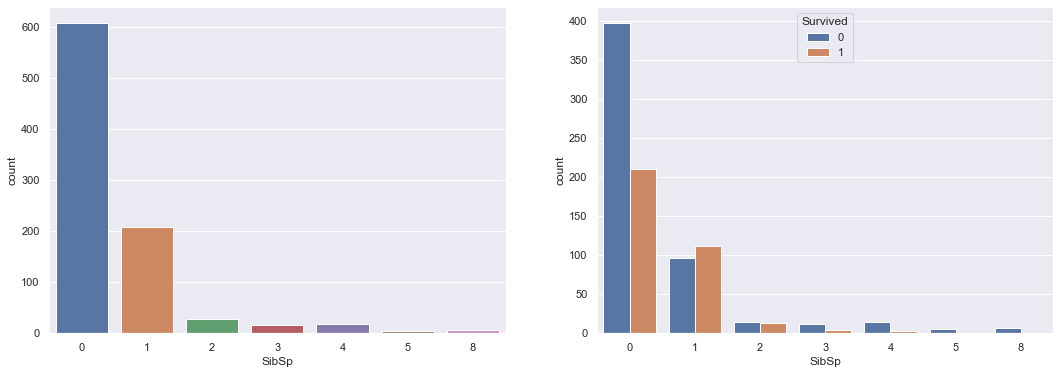

In [18]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="SibSp", data=train,ax = ax[0])
sns.countplot(x="SibSp",hue = 'Survived', data=train,ax = ax[1])

#### Column : Parch
<br>

<AxesSubplot:xlabel='Parch', ylabel='count'>

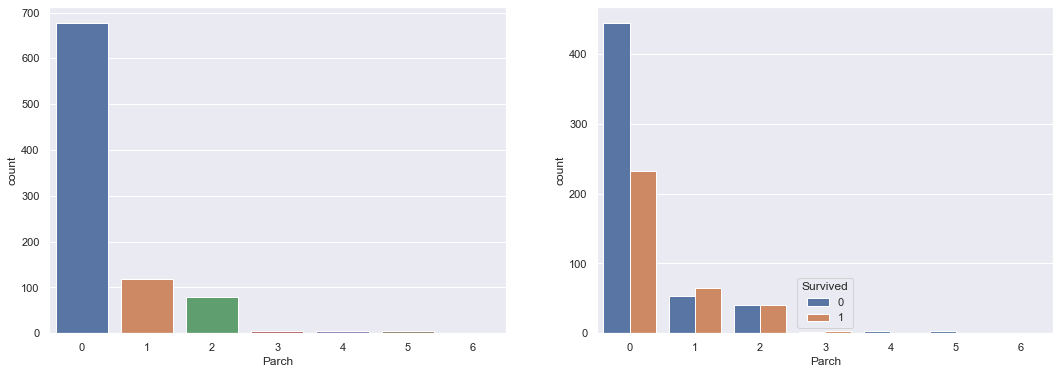

In [19]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Parch", data=train,ax = ax[0])
sns.countplot(x="Parch",hue = 'Survived', data=train,ax = ax[1])

#### Column: Fare
<br>

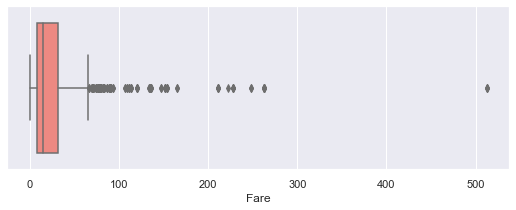

In [20]:
fig,ax = plt.subplots(figsize = (9,3))
ax = sns.boxplot(x=train['Fare'],color = '#ff7a70')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

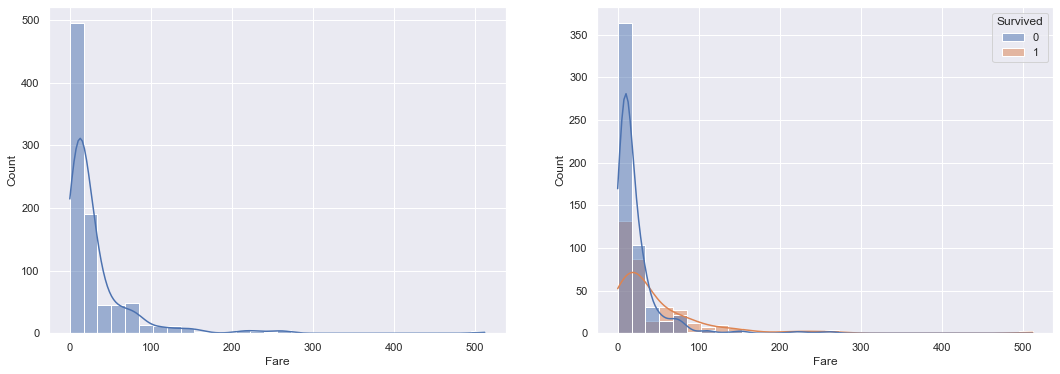

In [21]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.histplot(x="Fare",bins=30,kde = True, data=train,ax = ax[0])
sns.histplot(x="Fare",bins=30,kde = True,hue = 'Survived', data=train,ax = ax[1])

#### Column : Embarked
<br>

<AxesSubplot:xlabel='Embarked', ylabel='count'>

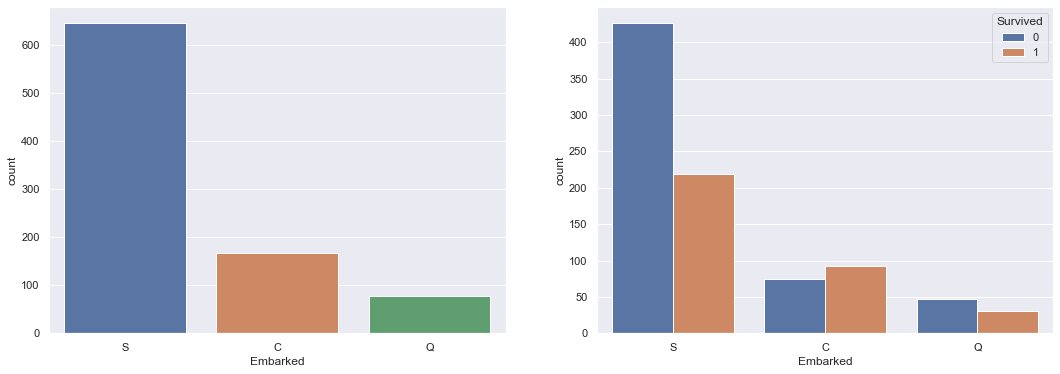

In [22]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Embarked",data=train,ax = ax[0])
sns.countplot(x="Embarked",hue = 'Survived', data=train,ax = ax[1])

#### Skewness

In [23]:
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

#### Kurtosis

In [24]:
train.kurt()

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.993871
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

#### IQR (Inter Quartile Range)

In [25]:
for i in train.columns:
    if train[i].dtype != 'object':
        print(i)
        print('IQR: ',train[i].quantile(.75) - train[i].quantile(.25))
        print('')


PassengerId
IQR:  445.0

Survived
IQR:  1.0

Pclass
IQR:  1.0

Age
IQR:  13.0

SibSp
IQR:  1.0

Parch
IQR:  0.0

Fare
IQR:  23.0896



### Bivariate Data Analysis

#### Let's See the Correlation among these attributes

In [141]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


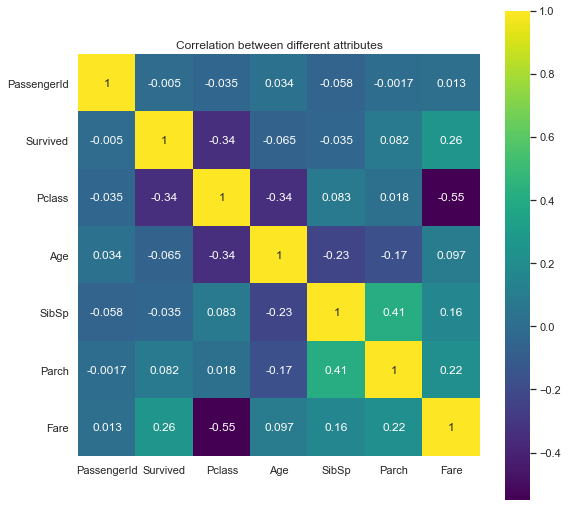

In [145]:
plt.figure(figsize=(9,9))
sns.heatmap(train.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()